<a href="https://colab.research.google.com/github/aynandu/Python-DeepLearning/blob/master/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Workflow

Resources :
  * Ground Truth notebook : https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
  * Book Version of Notebook :  https://www.learnpytorch.io/01_pytorch_workflow/
  * Ask a Question : https://github.com/mrdbourke/pytorch-deep-learning/discussions

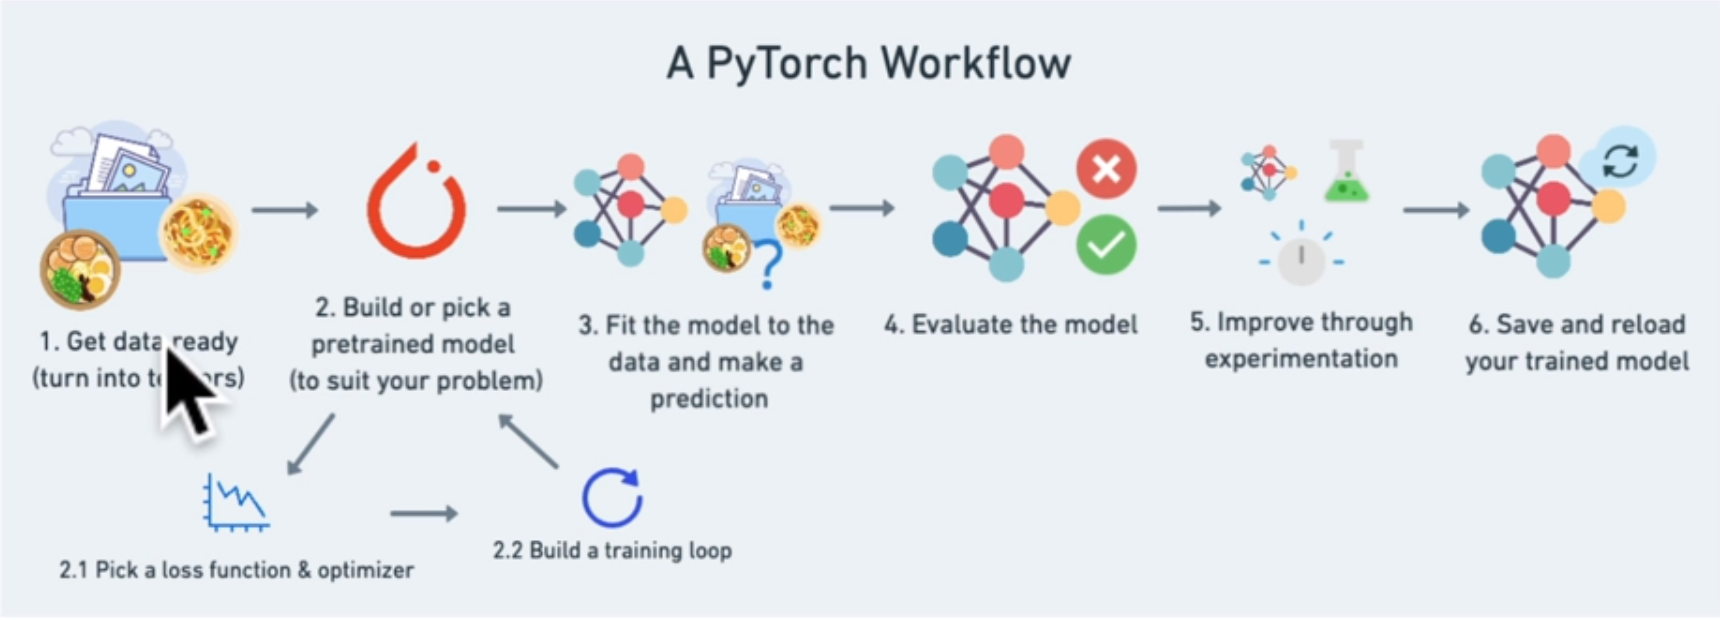

In [2]:
what_werw_covering= {1: "data (prepare and load)",
                     2: "build model",
                     3: "fitting the model to data (training)",
                     4: "making predictions and evaluting a model (inference)",
                     5: "savinh and loading a model",
                     6: "putting it all together"}
what_werw_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'savinh and loading a model',
 6: 'putting it all together'}

In [3]:
, torch_version
import torch
from torch import nn # nn contains all of PyTorch's building blocks for Neural Network ; reference : https://pytorch.org/docs/stable/nn.html
import matplotlib.pyplot as plt
#Check Pytorch Version
torch.__version__

'2.0.1+cu118'

#1. Data (Preparing and Loading)

Data can be almost anything...in the Machine Learning.
* Excel SpreadSheet
* Images of any kind
* Videos (Youtube has lots of data....)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a  numercial representation.
2. build a model to learn patterns inthat numerical representation

To showcase this, let's create some known data using the linear regression formula.

we'll use a linear regression formula to make a staright line with known parameter.

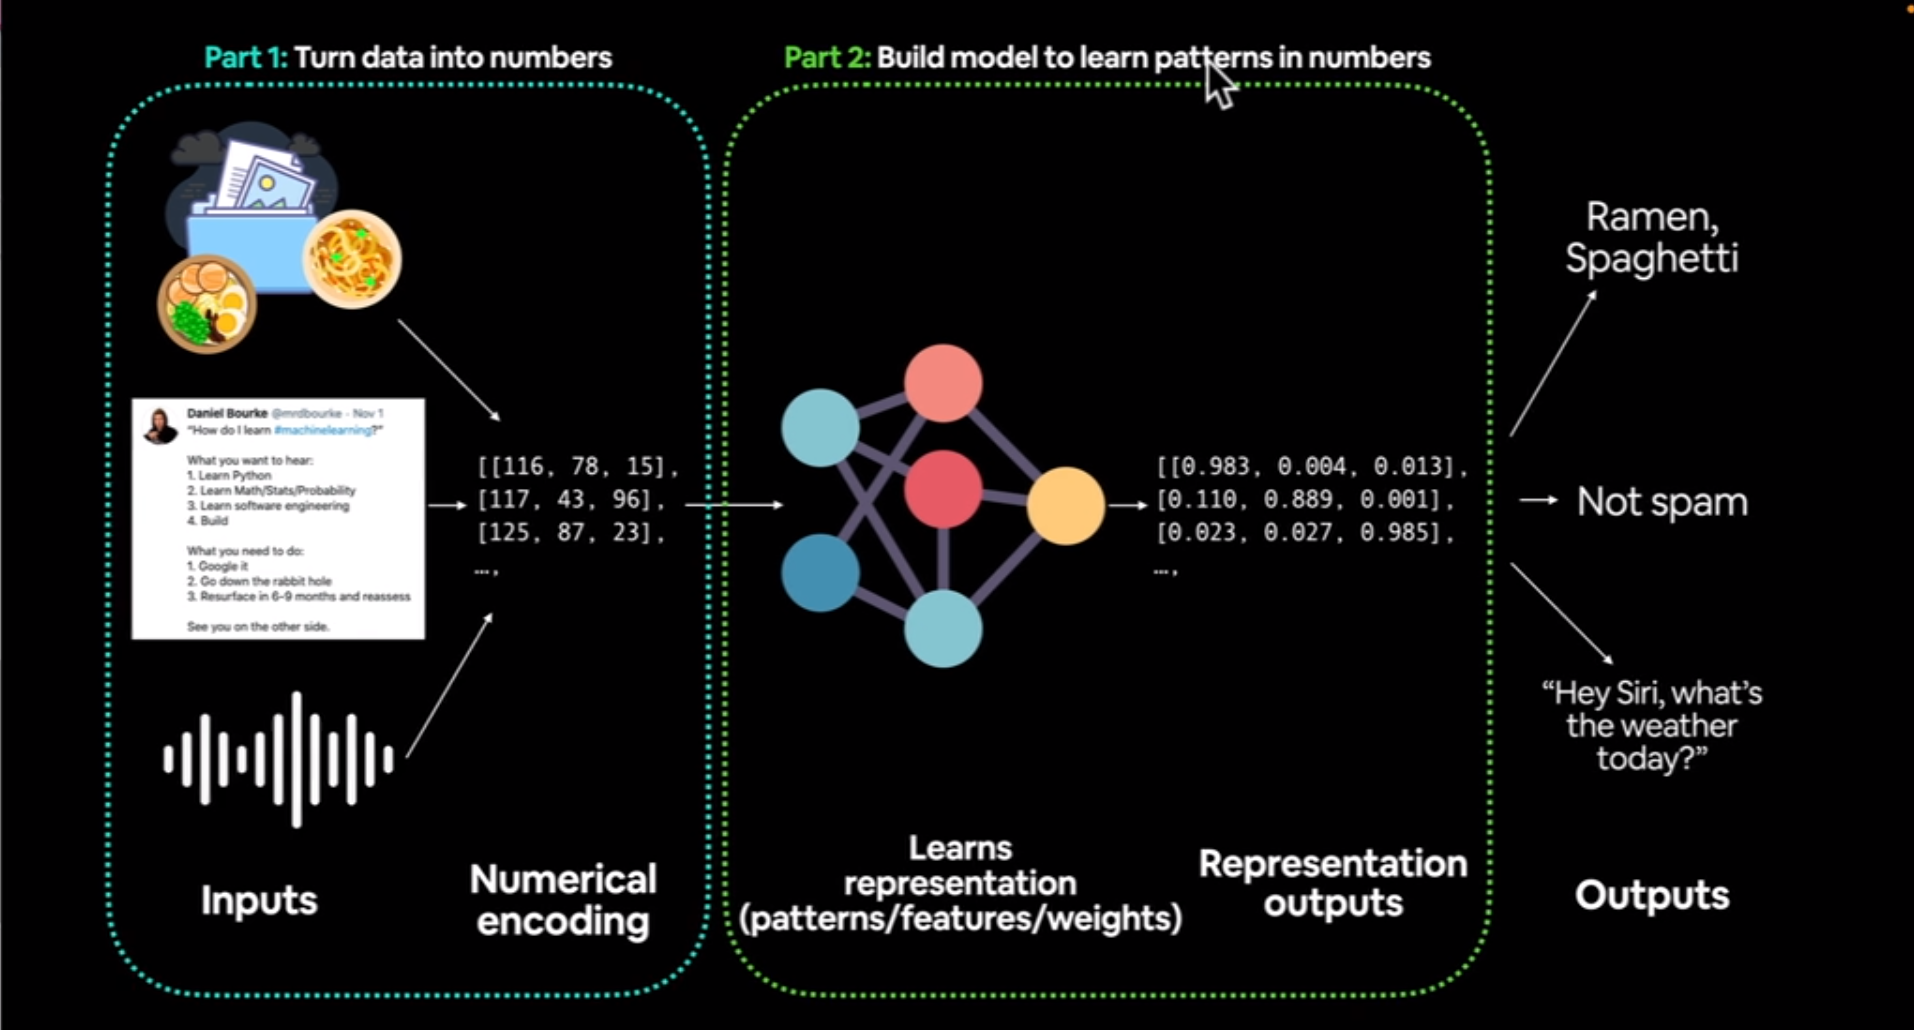

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

print(f"Input : \n {X[:10]}\n Output :\n {y[:10]}")

Input : 
 tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
 Output :
 tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [5]:
len(X),len(y),X.dtype , X.shape

(50, 50, torch.float32, torch.Size([50, 1]))

### Splitting data into Training and test set (one of the most important concept in ML in general)

Let's create a training and test set with our data

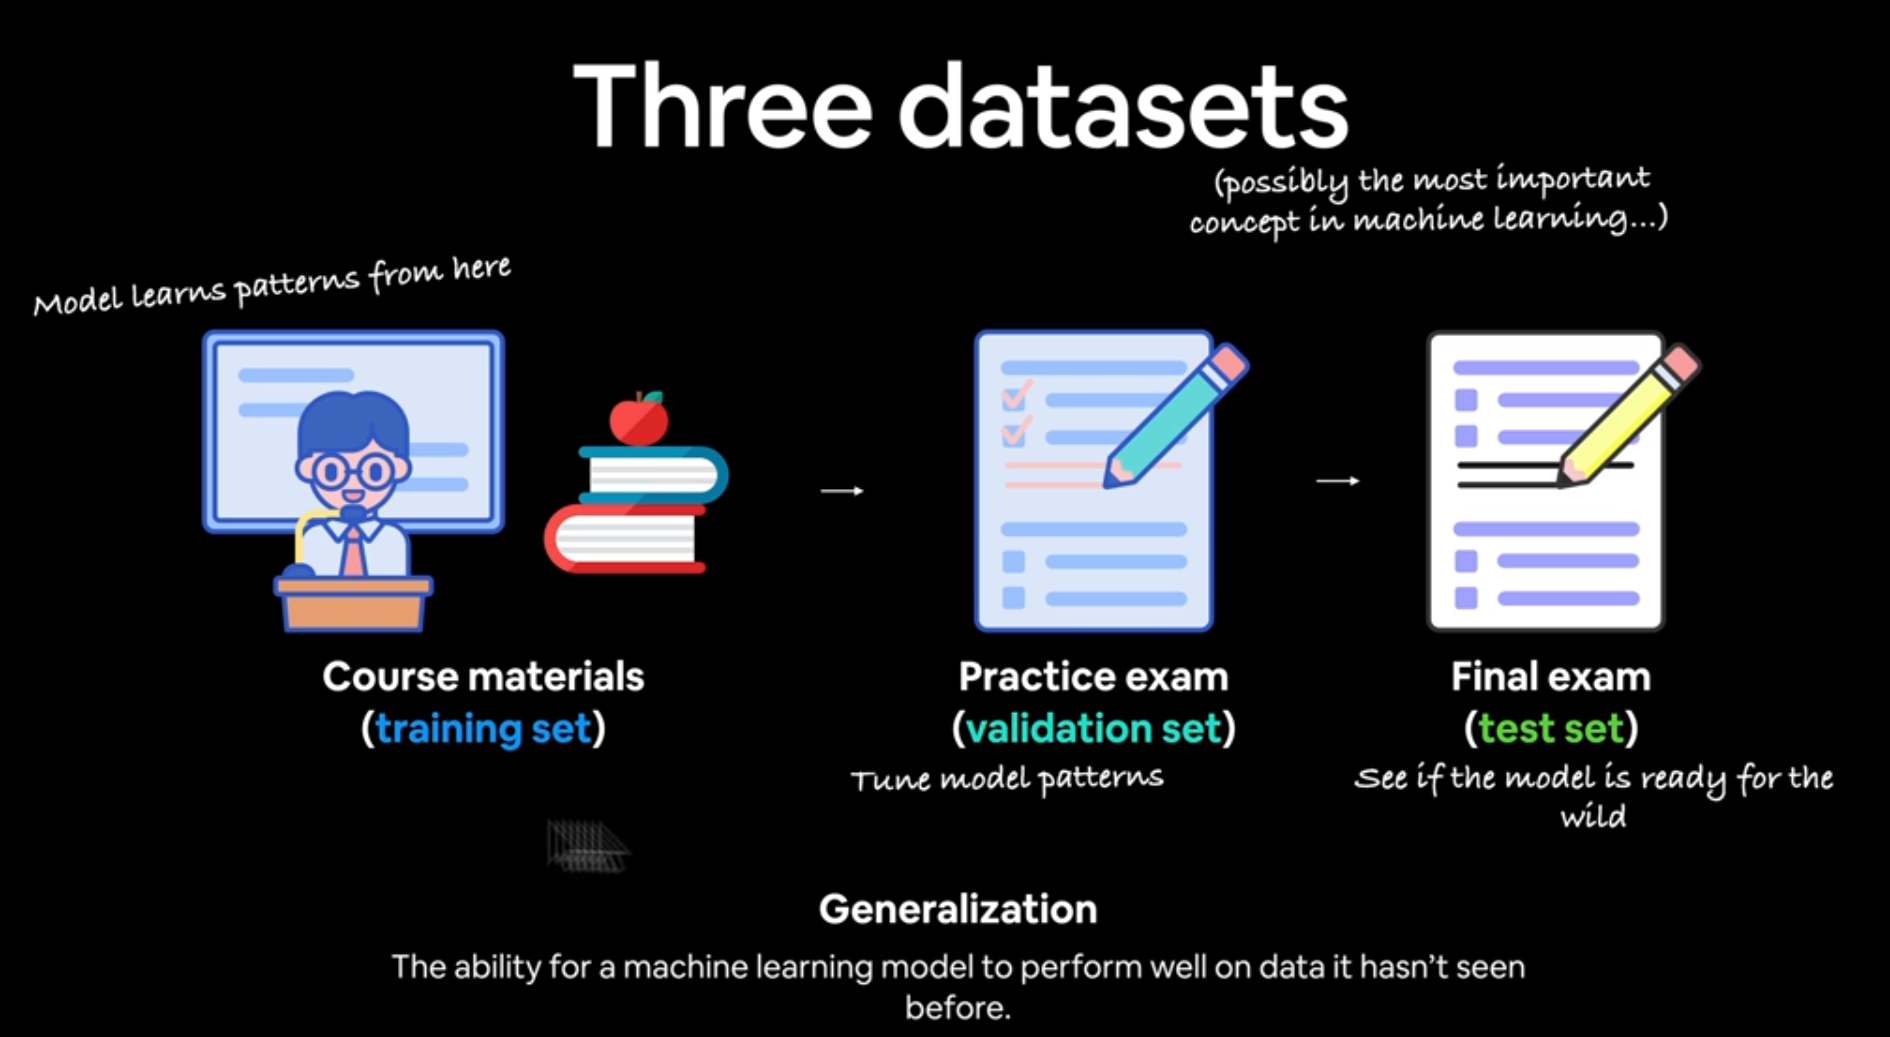

In [6]:
# Create a train/Test split --> Traing Set and Training Split are Same ; Testing Split and Testing Set are same
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test) ,train_split
#Training Features #Training Labels #testing Features 3 Testing Labels


(40, 40, 10, 10, 40)

###How might we better Visualize our data?
This is where the data explorer's motto comes in !
######"Visualize,visualize,Visualize"

In [18]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None
                    ):
  """
  Plots training data,test data and compare predictions.
  """
  plt.figure(figsize=(10,7))
  #Plot Training Data in blue
  plt.scatter(train_data,train_labels,c='b',s=14,label="Training Data")
  #Plot Testing data in Red
  plt.scatter(test_data,test_labels,c="r",s=14,label="Testing data")

  #Are there Predictions?
  if predictions is not None :
    #Plot the Predicitions if they exist
    plt.scatter(test_data,predictions,c="g",s=14,label="Predictions")
  # Show the Legend
  plt.legend(prop={"size":14})


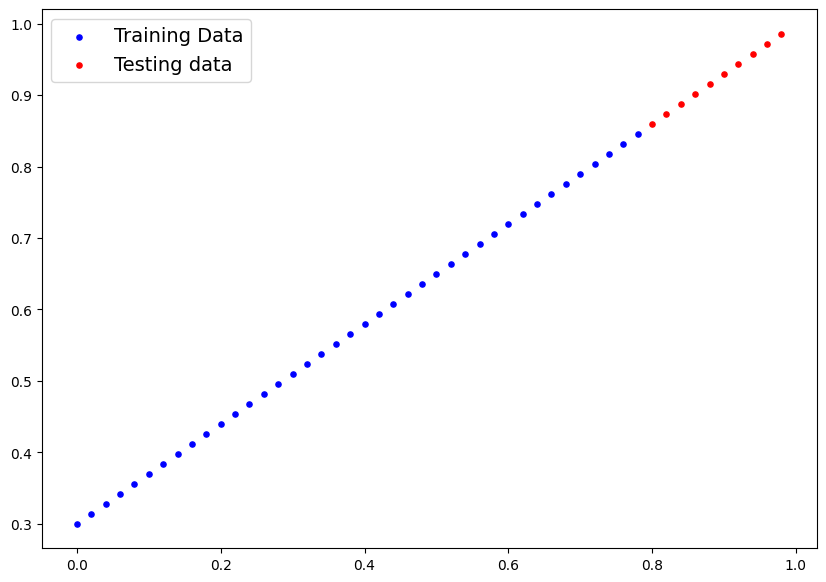

In [19]:
plot_predictions()